# Encodings and Other Techniques in Mutivariate Exploration of Data

Three main non-positional encodings:
- Shape
- Size
- Color

---

### Table of Contents

[Encodings]()
- [Example 1: Encodings with Shape]() 
- [Example 2: Encodings with Size]() 

In [1]:
import os
os.chdir("projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns")

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')

In [3]:
fuel_econ.VClass.value_counts().index

Index(['Midsize Cars', 'Compact Cars', 'Subcompact Cars', 'Large Cars',
       'Minicompact Cars'],
      dtype='object')

### Example 1: Encoding with SHAPE

#### Preparatory Step 1: Convert the car type in `VClass` as ordinal categorical data type.

In [4]:
# Extract the unique type in `VClass` values
sedan_classes = ['Minicompact Cars', 'Midsize Cars', 'Compact Cars', 'Subcompact Cars', 'Large Cars']

# Customize a categorical data type using `pd.api.types.CategoricalDtype()` function
vclass = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Convert the `VClass` column using newly defined data type
fuel_econ.VClass = fuel_econ.VClass.astype(vclass)

# Verification
fuel_econ.VClass.unique()

['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars', 'Minicompact Cars']
Categories (5, object): ['Minicompact Cars' < 'Midsize Cars' < 'Compact Cars' < 'Subcompact Cars' < 'Large Cars']

#### Preparatory Step 2: Extract the transmission type from `trans` column.

In [5]:
fuel_econ.loc[:, 'trans_type'] = fuel_econ.trans.apply(lambda x: x.split(' ')[0])

# Verification
fuel_econ.trans_type.value_counts()

Automatic    3068
Manual        861
Name: trans_type, dtype: int64

In [6]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


#### Step 3: Draw the scatter plot using `sns.regplot()` function.

In [7]:
np.random.seed(2018)
sample_mask = np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample_mask, :]

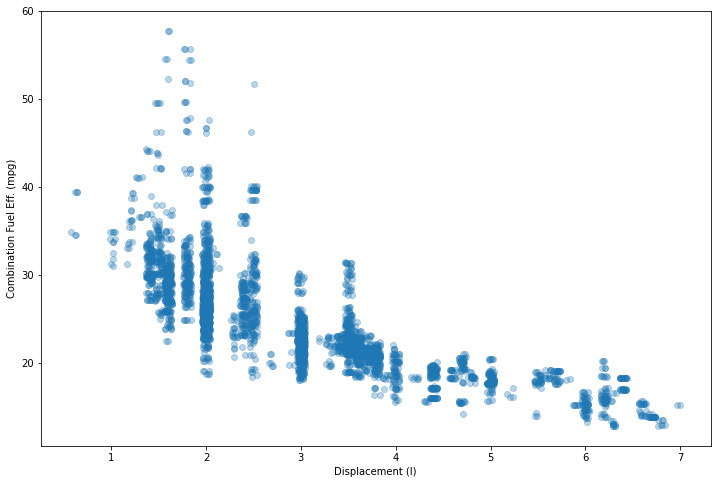

In [8]:
plt.figure(figsize=(12, 8))
sns.regplot(data=fuel_econ, x='displ', y='comb', fit_reg=False, x_jitter=0.04, scatter_kws={'alpha': 0.3})
plt.xlabel('Displacement (l)')
plt.ylabel('Combination Fuel Eff. (mpg)');

#### Step 4: Shape Encodings 

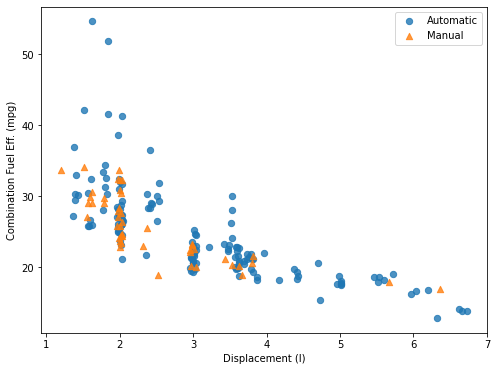

In [22]:
plt.figure(figsize=(8, 6))
t_type_markers = [['Automatic', 'o'], 
                 ['Manual', '^']]

for t_type, t_marker in t_type_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type']==t_type, :]
    sns.regplot(data=plot_data, x='displ', y='comb', \
                fit_reg=False, \
                x_jitter=0.04, \
                marker=t_marker, \
                scatter_kws={'s': 40})
plt.legend(['Automatic', 'Manual'])    
plt.xlabel('Displacement (l)')
plt.ylabel('Combination Fuel Eff. (mpg)');

### Example 2: Encoding with SIZE

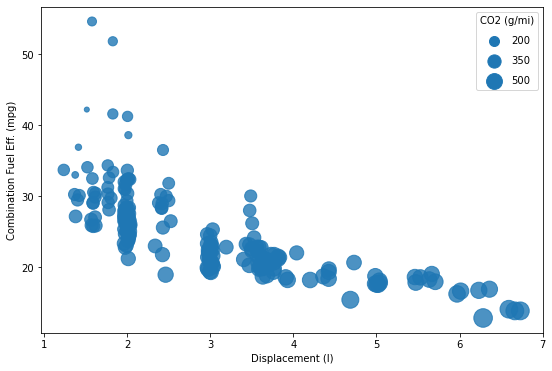

In [63]:
plt.figure(figsize=(9, 6))

# Add `co2` as the third variable
sns.regplot(data=fuel_econ_subset, \
            x='displ', \
            y='comb', \
            fit_reg=False, \
            x_jitter=0.04, \
            scatter_kws={'s': fuel_econ_subset['co2']/2})

# Concstruct the legend
sizes = [200, 350, 500]
legend_obj = []
base_color = sns.color_palette()[0]
for s in sizes:
    legend_obj.append(plt.scatter([], [], s=s/2, color=base_color))

plt.xlabel('Displacement (l)')
plt.ylabel('Combination Fuel Eff. (mpg)')
plt.legend(legend_obj, sizes, labelspacing=1, title='CO2 (g/mi)');